In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# sns.set_context("paper", rc={"figure.figsize": (4, 4)})

# Load data

In [2]:
df = pd.read_csv('../Metagenomic_binning_tools_to_consider.csv')
df

,can,Year published,Tool category,Sequences binned,User interface,Programming language(s),Length cut-off (bp),Composition,Abundance,Graphs,Other,Publication,Source code,Notes on methods used
0,TETRA,2004,Binning,Fragments,Web GUI,NaN,1000.0,Y,NaN,NaN,NaN,https://bmcbioinformatics.biomedcentral.com/ar...,NaN,frequencies of all 256 possible tetranucleotid...
1,CompostBin,2008,Binning,Short reads,CLI,"C, Matlab",1000.0,Y,NaN,NaN,NaN,https://link.springer.com/chapter/10.1007/978-...,http://bobcat.genomecenter.ucdavis.edu/souravc...,Extract hexamer frequencies. Project feature m...
2,LikelyBin,2009,Binning,Short reads,CLI,"Perl, C",400.0,Y,NaN,NaN,NaN,https://bmcbioinformatics.biomedcentral.com/ar...,https://static-content.springer.com/esm/art%3A...,Markov Chain Monte Carlo framework with a like...
3,MetaCluster 2.0,2010,Binning,Fragments,CLI,C,300.0,Y,NaN,NaN,NaN,https://dl.acm.org/doi/10.1145/1854776.1854803,https://i.cs.hku.hk/~alse/MetaCluster/,Extract F requencies o f l-mers in each DNA fr...
4,SCIMM,2010,Binning,Contigs and short reads,CLI,"Python, C, Matlab",400.0,Y,NaN,NaN,NaN,https://bmcbioinformatics.biomedcentral.com/ar...,https://www.cbcb.umd.edu/software/scimm/,Starts by clustering a subset of the sequences...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,CCVAE,2023,Binning,Contigs,CLI,Python,NaN,Y,Y,Assembly graph,Single-copy marker genes,https://openreview.net/forum?id=id8OSRGeew,https://github.com/MicrobialDarkMatter/ccvae,Get k-mer frequency and coverage. A VAE Variat...
67,ViralCC,2023,Viral binning,Contigs,CLI,Python,1000.0,NaN,NaN,NaN,NaN,https://www.nature.com/articles/s41467-023-359...,https://github.com/dyxstat/ViralCC,NaN
68,UGMAGrefiner,2023,Refiner,Unitigs,CLI,NaN,NaN,NaN,NaN,NaN,NaN,https://www.sciencedirect.com/science/article/...,NaN,(1) General de novo assembly which generates a...
69,COMEBin,2024,Binning,Contigs,CLI,Python,1000.0,Y,Y,NaN,Single-copy marker genes,https://www.nature.com/articles/s41467-023-442...,https://github.com/ziyewang/COMEBin,"The framework of COMEBin is shown in Fig. 6, w..."


# Plot by Category

Text(0.5, 0, 'Count of tools')

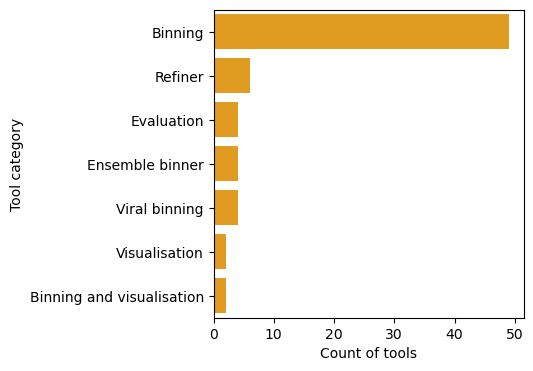

In [3]:
plt.figure(figsize=(4, 4))
sns.countplot(y='Tool category', data=df, order=df['Tool category'].value_counts().index, color="orange")
plt.ylabel("Tool category")
plt.xlabel("Count of tools")


# Plot by Language

Text(0.5, 0, 'Count of tools')

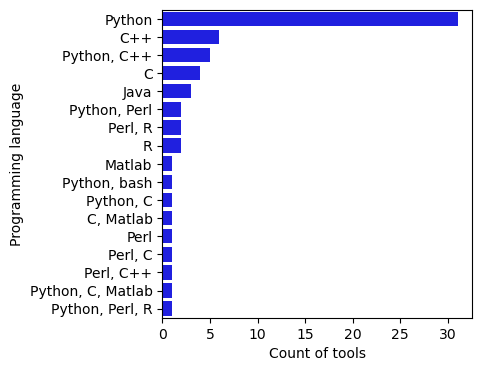

In [4]:
plt.figure(figsize=(4, 4))
sns.countplot(y='Programming language(s)', data=df, order=df['Programming language(s)'].value_counts().index, color="blue")
plt.ylabel("Programming language")
plt.xlabel("Count of tools")


# Plot by CLI/GUI

Text(0.5, 0, 'Count of tools')

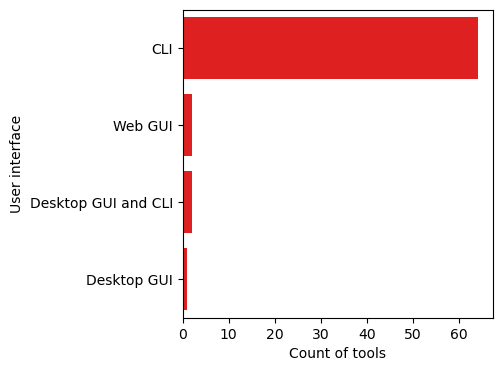

In [5]:
plt.figure(figsize=(4, 4))
sns.countplot(y='User interface', data=df, order=df['User interface'].value_counts().index, color="red")
plt.ylabel("User interface")
plt.xlabel("Count of tools")


# Plot by Contigs/reads

Text(0.5, 0, 'Count of tools')

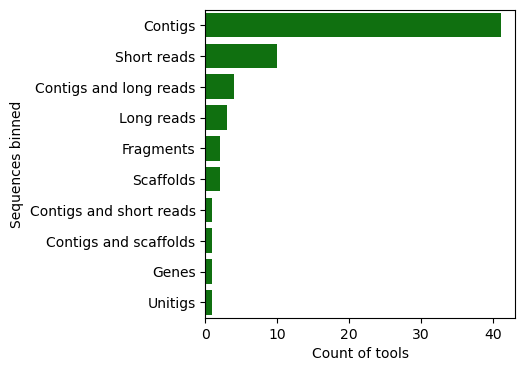

In [6]:
plt.figure(figsize=(4, 4))
sns.countplot(y='Sequences binned', data=df, order=df['Sequences binned'].value_counts().index, color="green")
plt.ylabel("Sequences binned")
plt.xlabel("Count of tools")


# All together

/var/folders/d_/jkfr20w97ts4vt06dgk79znh0000gn/T/ipykernel_88347/3556303407.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 1].set_yticklabels(['75', '100', '300', '400', '500', '1000', '1500', '2000', '2048', '2500', '5000'])


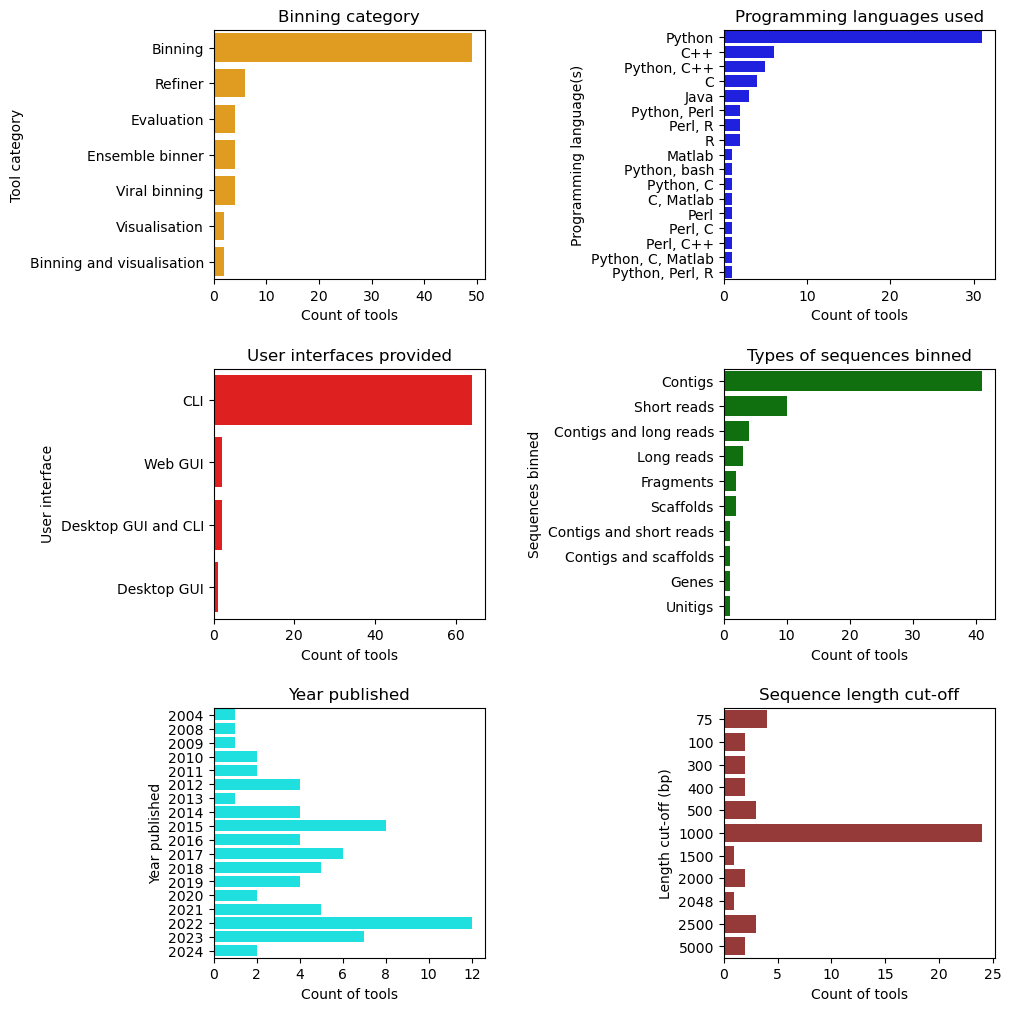

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)

# Create plots using Seaborn
g = sns.countplot(y='Tool category', data=df, order=df['Tool category'].value_counts().index, color="orange", ax=axes[0, 0])
axes[0, 0].set_xlabel('Count of tools')
axes[0, 0].set_title('Binning category')

sns.countplot(y='Programming language(s)', data=df, order=df['Programming language(s)'].value_counts().index, color="blue", ax=axes[0, 1])
axes[0, 1].set_xlabel('Count of tools')
axes[0, 1].set_title('Programming languages used')

sns.countplot(y='User interface', data=df, order=df['User interface'].value_counts().index, color="red", ax=axes[1, 0])
axes[1, 0].set_xlabel('Count of tools')
axes[1, 0].set_title('\nUser interfaces provided')

sns.countplot(y='Sequences binned', data=df, order=df['Sequences binned'].value_counts().index, color="green", ax=axes[1, 1])
axes[1, 1].set_ylabel('\n\nSequences binned')
axes[1, 1].set_xlabel('Count of tools')
axes[1, 1].set_title('\nTypes of sequences binned')

sns.countplot(y='Year published', data=df, order=df['Year published'].unique(), color="aqua", ax=axes[2, 0])
axes[2, 0].set_xlabel('Count of tools')
axes[2, 0].set_title('\nYear published')
axes[2, 0].set_xticks(np.arange(0, 13, 2))


lengths = list(df['Length cut-off (bp)'].unique())
# print(lengths)
del lengths[5]
lengths.sort()
lengths_int = [str(int(x)) for x in lengths]

sns.countplot(y='Length cut-off (bp)', data=df, order=lengths, color="brown", ax=axes[2, 1])
axes[2, 1].set_xlabel('Count of tools')
axes[2, 1].set_title('\nSequence length cut-off')
axes[2, 1].set_yticklabels(['75', '100', '300', '400', '500', '1000', '1500', '2000', '2048', '2500', '5000'])

plt.savefig('../Images/binning_tools_summarised.png', dpi=300, format="png", bbox_inches='tight')
plt.show()